# Spam Classifier

Each and every individual faces the problem of missing crucial e-mails because of the various unwanted emails recieved daily due to signing up with various websites for some or the other purposes.

This websites then keeping on sending us various updates and any change in their system through emails. So, at times it might happen that we miss our any important mails which need to be addressed as soon as possible.

So to overcome this in most better way,this model is designed to create filter of ham/spam mails.

## Importing Libraries and reading the data

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.feature_extraction.text import CountVectorizer
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
#!pip install wordcloud
from wordcloud import WordCloud
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score,precision_score,confusion_matrix,recall_score,f1_score

%matplotlib inline

In [3]:
##Loading datase
mails = pd.read_csv('spam.csv',encoding='latin-1')
mails.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


## Data Cleaning

In [4]:
## Droping unnecessary features
new_mails=mails.drop(['Unnamed: 2','Unnamed: 3','Unnamed: 4'],axis=1)

In [5]:
new_mails.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [6]:
## Renaming the columns
new_mails = new_mails.rename(columns = {'v1':'Spam/Not_Spam','v2':'message'})
new_mails.head()

,Spam/Not_Spam,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [8]:
## Information of the dataset
new_mails.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Spam/Not_Spam  5572 non-null   object
 1   message        5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


Text(0.5, 0, 'Label')

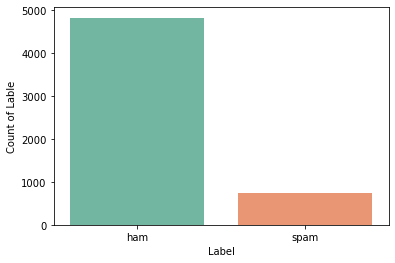

In [10]:
## plotting the count of label
label=new_mails['Spam/Not_Spam'].value_counts().reset_index()
sns.barplot(x=label['index'],y=label['Spam/Not_Spam'],palette="Set2")
plt.ylabel('Count of Lable')
plt.xlabel('Label')

**ham** messages are **high** in number compared to **spam** messages. The dataset is slightly imbalanced or skewed. We have to take this imbalance into account while training the model.

In [11]:
## Adding a column to capture the length of each feature 
new_mails['Message_length'] = new_mails['message'].apply(len)

In [12]:
new_mails.groupby('Spam/Not_Spam')['Message_length'].describe()

,count,mean,std,min,25%,50%,75%,max
Spam/Not_Spam,,,,,,,,
ham,4825.0,71.023627,58.016023,2.0,33.0,52.0,92.0,910.0
spam,747.0,138.866131,29.183082,13.0,132.5,149.0,157.0,224.0


The mean length of spam messages are larger than the mean length of the ham messages. Usually, the length of the spam messages are larger in length of the non-spam messages. To verify it again, we will check the distribution plot

Text(0, 0.5, 'Freequency')

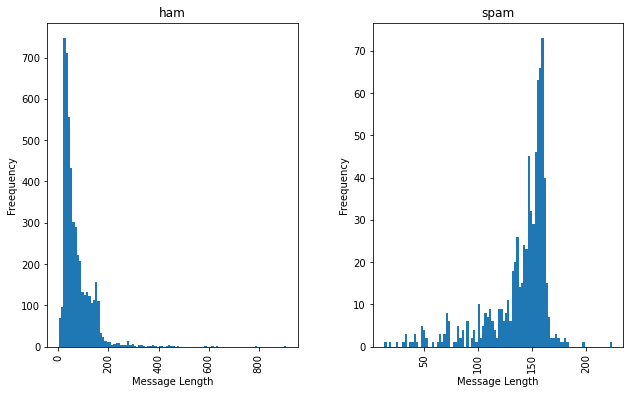

In [13]:
dist_message = new_mails['Message_length'].hist(bins=100,by=new_mails['Spam/Not_Spam'],figsize=(10,6))
dist_message[0].set_xlabel("Message Length")
dist_message[0].set_ylabel("Freequency")
dist_message[1].set_xlabel("Message Length")
dist_message[1].set_ylabel("Freequency")

We can see the length of spam email is larger than ham email

In [15]:
## Adding a feature to capture the label
new_mails['label']=np.where(new_mails['Spam/Not_Spam']=='spam',1,0)
new_mails

,Spam/Not_Spam,message,Message_length,label
0,ham,"Go until jurong point, crazy.. Available only ...",111,0
1,ham,Ok lar... Joking wif u oni...,29,0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,1
3,ham,U dun say so early hor... U c already then say...,49,0
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,0
...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,161,1
5568,ham,Will Ì_ b going to esplanade fr home?,37,0
5569,ham,"Pity, * was in mood for that. So...any other s...",57,0
5570,ham,The guy did some bitching but I acted like i'd...,125,0


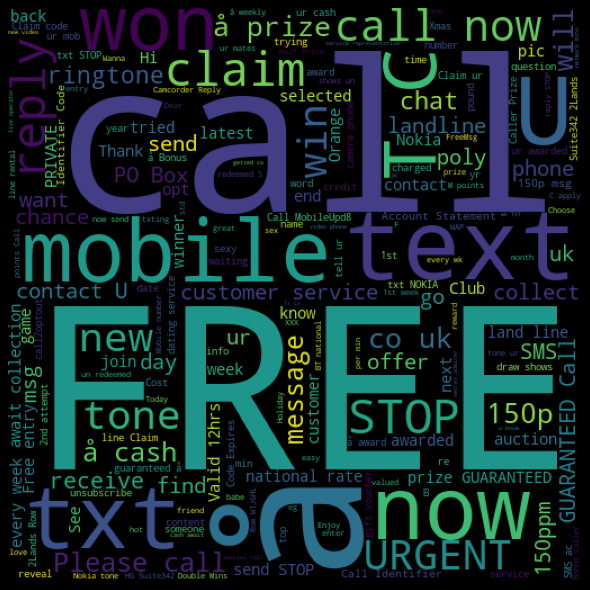

In [16]:
## Word Cloud for spam
spam_words = ' '.join(list (new_mails[new_mails['label'] == 1] ['message']))
spam_wc = WordCloud (width = 512,height = 512).generate(spam_words) 
plt.figure(figsize = (10, 8), facecolor = 'k') 
plt.imshow(spam_wc) 
plt.axis ('off')
plt. tight_layout (pad = 0)

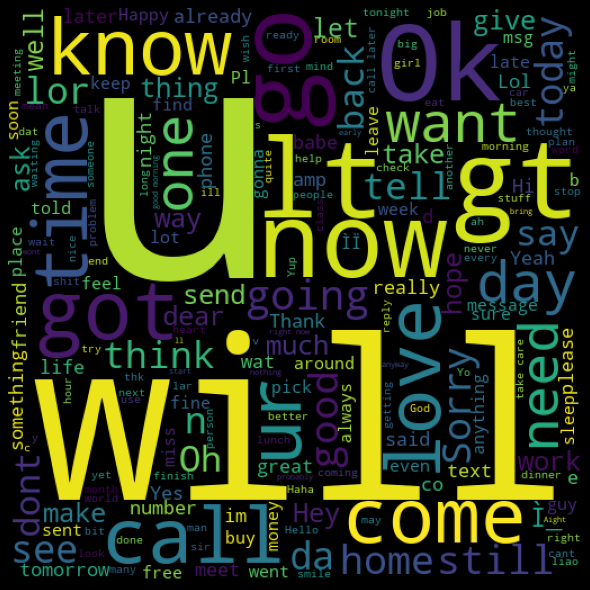

In [17]:
## Word Cloud for ham
spam_words = ' '.join(list (new_mails[new_mails['label'] ==0] ['message']))
spam_wc = WordCloud (width = 512,height = 512).generate(spam_words) 
plt.figure(figsize = (10, 8), facecolor = 'k') 
plt.imshow(spam_wc) 
plt.axis ('off')
plt. tight_layout (pad = 0)

## Feature Engineering

In [18]:
## Test train split
X_train,X_test,y_train,y_test=train_test_split(new_mails['message'],new_mails['label'],train_size=0.75,random_state=1)

In [19]:
print('Length of X_train:',len(X_train))
print('Length of y_train:',len(y_train))
print('Length of X_test:',len(X_test))
print('Length of y_test:',len(y_test))

Length of X_train: 4179
Length of y_train: 4179
Length of X_test: 1393
Length of y_test: 1393


#### Vectorization
To convert the messages into a vector with which SciKit Learn's model can work, we will use the bag-of-words model:

In [20]:
cv=CountVectorizer()

In [52]:
feature_train=cv.fit_transform(X_train)
feature_test=cv.transform(X_test)


## Model Building

* **Logistic Regression**

In [71]:
lr=LogisticRegression(random_state=1)
lr.fit(feature_train,y_train)

LogisticRegression(random_state=1)

In [72]:
y_pred=lr.predict(feature_test)

In [73]:
confusion_matrix(y_test, y_pred)

array([[1211,    2],
       [  17,  163]], dtype=int64)

In [74]:
print('The accuracy of the model is',accuracy_score(y_test, y_pred))
print('The precision score for the model is',precision_score(y_test, y_pred))
print('The recall score for the model is',recall_score(y_test,y_pred))
print('The f1 score is',f1_score(y_test,y_pred))

The accuracy of the model is 0.9863603732950467
The precision score for the model is 0.9878787878787879
The recall score for the model is 0.9055555555555556
The f1 score is 0.9449275362318841


In [58]:
## Logistic regression after chosing parametrs through grid search cv

In [59]:
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000] }
clf = GridSearchCV(LogisticRegression(penalty='l2'), param_grid)

In [75]:
lr1=GridSearchCV(LogisticRegression(random_state=1),param_grid)
lr1.fit(feature_train,y_train)

GridSearchCV(estimator=LogisticRegression(random_state=1),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]})

In [76]:
y_pred1=lr1.predict(feature_test)

In [88]:
confusion_matrix(y_test, y_pred1)

array([[1211,    2],
       [  13,  167]], dtype=int64)

In [77]:
print('The accuracy of the model is',accuracy_score(y_test, y_pred1))
print('The precision score for the model is',precision_score(y_test, y_pred1))
print('The recall score for the model is',recall_score(y_test,y_pred1))
print('The f1 score is',f1_score(y_test,y_pred1))

The accuracy of the model is 0.9892318736539842
The precision score for the model is 0.9881656804733728
The recall score for the model is 0.9277777777777778
The f1 score is 0.9570200573065902


* **Support vector machine**

In [78]:
model=svm.SVC()
model.fit(feature_train,y_train)

SVC()

In [79]:
## Accuracy without tuning parameter
model.score(feature_test,y_test)

0.9870782483847811

In [80]:
param_grid = {'C': [0.1, 1, 10, 100, 1000], 
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf']} 
  

In [81]:
model1=GridSearchCV(svm.SVC(), param_grid, refit = True, verbose = 3)

In [40]:
model1.fit(feature_train,y_train)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.865 total time=   2.2s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.865 total time=   2.2s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.864 total time=   2.9s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.864 total time=   2.4s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.865 total time=   2.2s
[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.865 total time=   1.2s
[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.865 total time=   1.1s
[CV 3/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.864 total time=   1.1s
[CV 4/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.864 total time=   1.1s
[CV 5/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.865 total time=   1.1s
[CV 1/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.866 total time=   0.7s
[CV 2/5] END .....C=0.1, gamma=0.01, kernel=rbf

[CV 2/5] END .......C=1000, gamma=1, kernel=rbf;, score=0.895 total time=   2.3s
[CV 3/5] END .......C=1000, gamma=1, kernel=rbf;, score=0.896 total time=   2.2s
[CV 4/5] END .......C=1000, gamma=1, kernel=rbf;, score=0.892 total time=   2.3s
[CV 5/5] END .......C=1000, gamma=1, kernel=rbf;, score=0.886 total time=   2.3s
[CV 1/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.940 total time=   1.2s
[CV 2/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.961 total time=   1.5s
[CV 3/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.958 total time=   1.3s
[CV 4/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.956 total time=   2.2s
[CV 5/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.949 total time=   1.6s
[CV 1/5] END ....C=1000, gamma=0.01, kernel=rbf;, score=0.965 total time=   0.6s
[CV 2/5] END ....C=1000, gamma=0.01, kernel=rbf;, score=0.988 total time=   0.5s
[CV 3/5] END ....C=1000, gamma=0.01, kernel=rbf;, score=0.977 total time=   0.5s
[CV 4/5] END ....C=1000, gam

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']},
             verbose=3)

In [43]:
## Accuracy after tuning parameter
model1.score(feature_test,y_test)

0.9892318736539842

In [44]:
y_pred2=model1.predict(feature_test)

In [91]:
confusion_matrix(y_test, y_pred2)

array([[1211,    2],
       [  13,  167]], dtype=int64)

In [45]:
print('The accuracy of the model is',accuracy_score(y_test, y_pred2))
print('The precision score for the model is',precision_score(y_test, y_pred2))
print('The recall score for the model is',recall_score(y_test,y_pred2))
print('The f1 score is',f1_score(y_test,y_pred2))

The accuracy of the model is 0.9892318736539842
The precision score for the model is 0.9881656804733728
The recall score for the model is 0.9277777777777778
The f1 score is 0.9570200573065902


* **Decision Tree**

In [82]:
from sklearn.tree import DecisionTreeClassifier
d_tree=DecisionTreeClassifier()
d_tree.fit(feature_train,y_train)

DecisionTreeClassifier()

In [83]:
y_pred3=d_tree.predict(feature_test)

In [92]:
confusion_matrix(y_test, y_pred3)

array([[1183,   30],
       [  20,  160]], dtype=int64)

In [84]:
d_tree.score(feature_test,y_test)

0.9641062455132807

In [85]:
print('The precision score for the model is',precision_score(y_test, y_pred3))
print('The recall score for the model is',recall_score(y_test,y_pred3))
print('The f1 score is',f1_score(y_test,y_pred3))

The precision score for the model is 0.8421052631578947
The recall score for the model is 0.8888888888888888
The f1 score is 0.8648648648648649


SVM has the highest accuracy